In [1]:
import pandas as pd

In [2]:

df = pd.read_csv("data/titanic.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [3]:

from binarybeech.binarybeech import *


In [4]:

import logging
logging.basicConfig(level=logging.INFO)


In [5]:
gbt_titanic = GradientBoostedTree(df_titanic.copy(),"Survived")

In [6]:
gbt_titanic.X_names

['Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [7]:
it=gbt_titanic._initial_tree()

INFO:binarybeech.binarybeech:A tree with 2 leafs was created


In [8]:
it.tree.show()

0.3744360902255639



In [9]:
it.tree.root

In [10]:

gbt_titanic.learning_rate=0.5
gbt_titanic.create_trees(20)


INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 12.480601489264634
INFO:binarybeech.binarybeech:A tree with 15 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 10.046651863031617
INFO:binarybeech.binarybeech:A tree with 15 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 9.16104303701688
INFO:binarybeech.binarybeech:A tree with 15 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 8.734519388887104
INFO:binarybeech.binarybeech:A tree with 15 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 8.615699471719962
INFO:binarybeech.binarybeech:A tree with 13 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 8.43654883058252
INFO:binarybeech.binarybeech:A tree with 8 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 8.404091687312805
INFO:binarybeech.binarybeech:A tree with 14 leafs was created
INFO:binarybeech.binarybeech:Norm of pseudo-residuals: 8

In [11]:

gbt_titanic.predict(df_titanic.iloc[0])

0.6380478824501777

In [12]:

gbt_titanic.validate(df_test)


{'precision': array([0.91559633, 0.78654971]),
 'recall': array([0.87237762, 0.85396825]),
 'F-score': 0.856169152805201,
 'accuracy': 0.8658399098083427}

#k-fold cross-validation

In [13]:

c = CART(df_titanic,"Survived",metrics_type="classification")


INFO:binarybeech.binarybeech:A tree with 105 leafs was created
INFO:binarybeech.binarybeech:A tree with 85 leafs was created
/home/jovyan/binarybeech/metrics.py:106: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)
INFO:binarybeech.binarybeech:A tree with 89 leafs was created
INFO:binarybeech.binarybeech:A tree with 94 leafs was created
INFO:binarybeech.binarybeech:A tree with 82 leafs was created
INFO:binarybeech.binarybeech:A tree with 93 leafs was created
INFO:binarybeech.binarybeech:beta_best: 0.0029313667202432976
INFO:binarybeech.binarybeech:A tree with 105 leafs was created


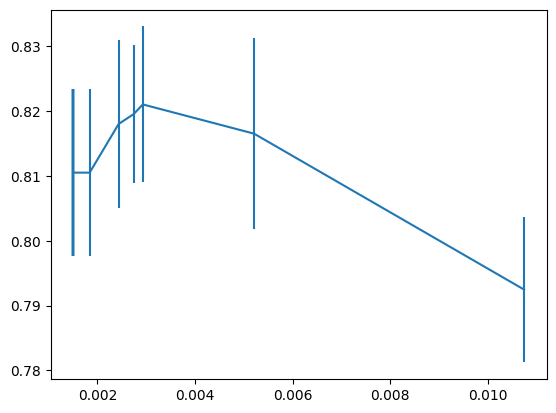

In [14]:
c.train(slack=1e-3)

In [15]:
c.tree.leaf_count()

5

In [16]:
c.tree.show()

Sex in ('female',)
├── False:0
└── True: Pclass<2.24
    ├── False:Fare<23.77
    │   ├── False:0
    │   └── True: Age<37.77
    │       ├── False:0
    │       └── True: 1
    └── True: 1



In [18]:
c.validate(df_test)

{'precision': array([0.90825688, 0.66959064]),
 'recall': array([0.81414474, 0.82078853]),
 'F-score': 0.7980748952882141,
 'accuracy': 0.8162344983089064}